# SPACEDOS 02 Calibration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets

In [2]:
fto = ['/storage/experiments/2020/01_HIMAC/C400/AIRDOS/98/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/C400/AIRDOS/DD_SPACE/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/C400/AIRDOS/9D/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/C400/AIRDOS/CE/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/H160/AIRDOS/run4/9D/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/H160/AIRDOS/run4/CE/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/H160/AIRDOS/run5/9D/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/H160/AIRDOS/run5/CE/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/He150/AIRDOS/run7/9D/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/He150/AIRDOS/run7/CE/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/He150/AIRDOS/run8/9D/DATALOG.TXT',
'/storage/experiments/2020/01_HIMAC/He150/AIRDOS/run8/CE/DATALOG.TXT']

w = widgets.Select(
    options=fto,
    rows=len(fto),
    layout={'width': 'max-content'},
    description='File:',
    disabled=False
)

display(w)


Select(description='File:', layout=Layout(width='max-content'), options=('/storage/experiments/2020/01_HIMAC/C…

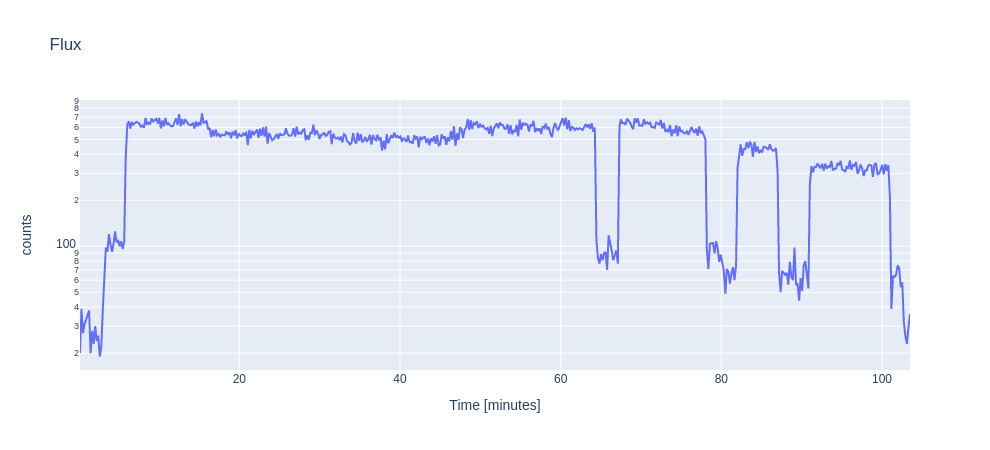

In [29]:
l=[]
l.extend(range(0,258))
df = pd.read_csv(w.value, sep=',', header=None, names=l, comment='*',engine='python' )
df = df.reset_index(drop=True)
rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)
rc = rc.apply(pd.to_numeric, errors='coerce')
rc['counts'] = rc.iloc[:,7:255].sum(axis=1)

data = [go.Scatter(x=rc[2]/60, y=rc['counts'])]
layout = go.Layout(title='Flux', yaxis=dict(title='counts', type='log'), xaxis=dict(title='Time [minutes]'))
#layout = go.Layout(title='Flux', yaxis=dict(title='counts'), xaxis=dict(title='Time [minutes]'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [4]:
fr = widgets.IntText(value=0, description='From Minute:', disabled=False)
to = widgets.IntText(value=100, description='To Minute:', disabled=False)

display(fr)
display(to)

IntText(value=0, description='From Minute:')

IntText(value=100, description='To Minute:')

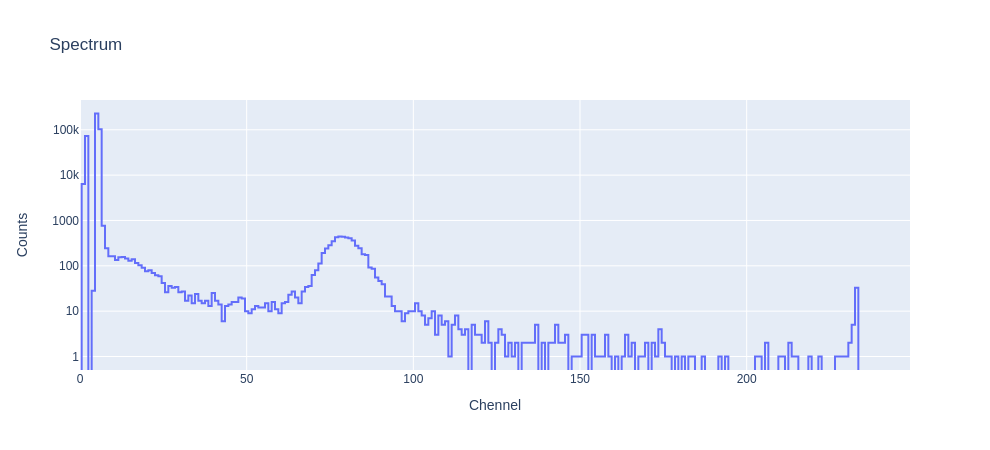

In [34]:
FROM_CHANNEL = 0
TO_CHANNEL = 250

spectrum = rc.loc[(rc[2]/60) >= fr.value].loc[(rc[2]/60) <= to.value].iloc[:,FROM_CHANNEL:TO_CHANNEL].sum()

data = [go.Scatter(x=spectrum.index, y=spectrum, line=dict(shape='hvh'))]

layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts', type='log'), xaxis=dict(title='Chennel'))
#layout = go.Layout(title='Spectrum', yaxis=dict(title='Counts'), xaxis=dict(title='Chennel'))

fig = go.Figure(data=data, layout=layout)
fig.show()

In [57]:
rc.iloc[:,6:]
rc

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,counts
0,NaN,0,10,22,18263.0,3507.0,13,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,24194.0,1.0,257.0,1.0
1,NaN,1,22,21,17964.0,3837.0,10,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,24168.0,0.0,257.0,0.0
2,NaN,2,34,14,17918.0,3845.0,12,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,24211.0,0.0,257.0,0.0
3,NaN,3,46,14,17736.0,3995.0,15,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,24240.0,0.0,257.0,0.0
4,NaN,4,58,10,17896.0,3919.0,5,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,24170.0,0.0,256.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,NaN,270,3368,30,18011.0,3702.0,13,10,5.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,24195.0,49.0,256.0,49.0
271,NaN,271,3380,24,17745.0,3928.0,18,11,4.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,24252.0,33.0,256.0,33.0
272,NaN,272,3392,23,18061.0,3714.0,9,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,24190.0,3.0,256.0,3.0
273,NaN,273,3404,26,18116.0,3670.0,6,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,24182.0,0.0,257.0,0.0
